In [1]:
import sys
sys.path.append(sys.path[0] + '/bin')

In [2]:
import PyMorpionSolitaire

In [3]:
from PIL import Image

Display module information:

In [4]:
# help(PyMorpionSolitaire)

Create a new game with default type (5 points in a line, touching allowed, starting configuration 'cross'):

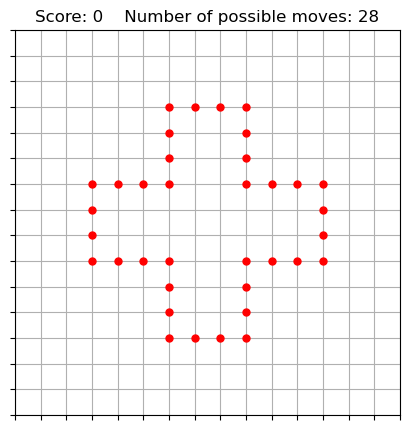

In [5]:
game = PyMorpionSolitaire.Game5T('c')
game.print()

Play a specific move:

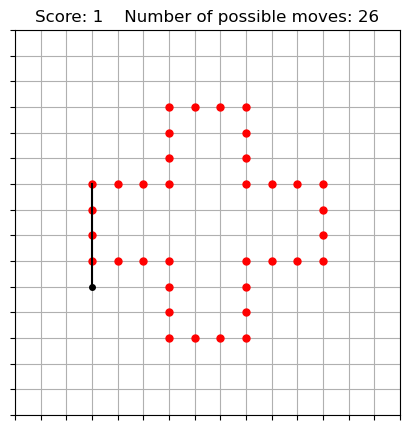

In [23]:
game.playByIndex(0)
game.print()

Play a move at random:

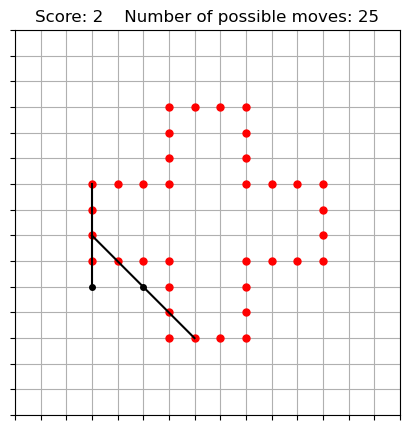

In [24]:
game.playAtRandom(1)
game.print()

Play several moves at random:

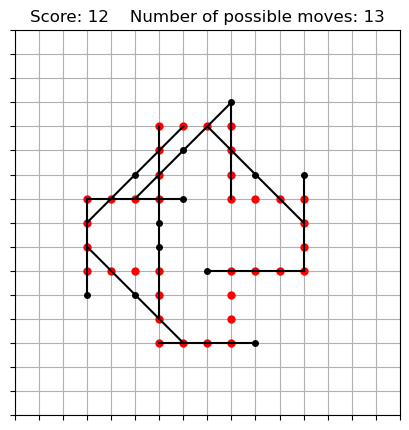

In [25]:
game.playAtRandom(10)
game.print()

Play at random until no more moves are possible:

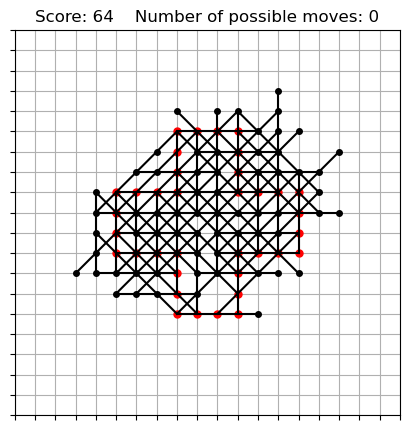

In [26]:
game.playAtRandom()
game.print()

Save game:

In [39]:
game.save('data/test_game.json')

Undo one move:

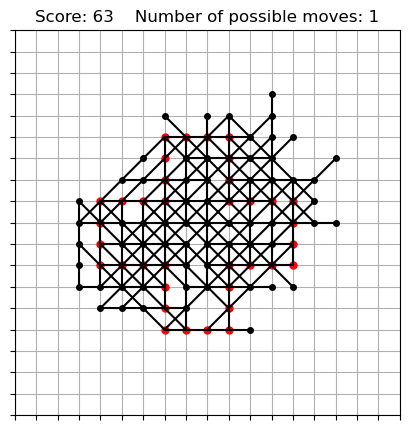

In [28]:
game.undo()
game.print()

Undo more moves:

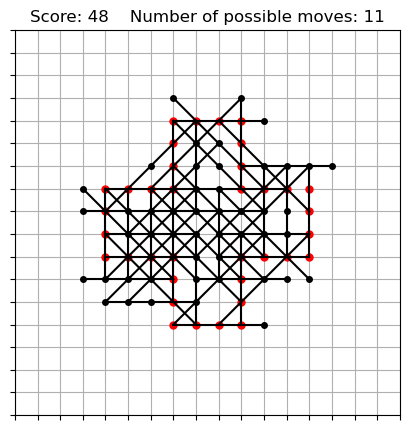

In [29]:
game.undo(15)
game.print()

Load a previously saved game:

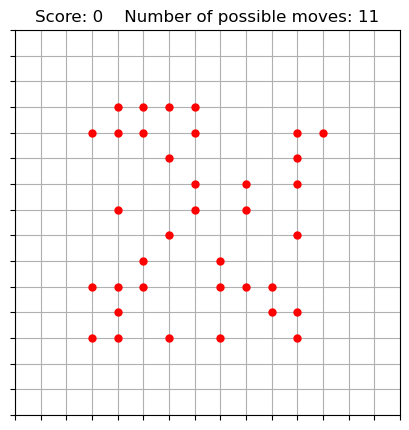

In [40]:
game = PyMorpionSolitaire.Game5T.load('data/test_game.json')
game.print()

The state of the game is stored in a boolean array of size 192 x 192:

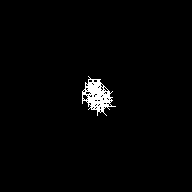

In [31]:
Image.fromarray(game.image())

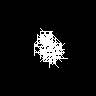

In [32]:
Image.fromarray(game.image()[48:144, 48:144])

Play using the nested Monte-Carlo algorithm:

CPU times: user 73.1 ms, sys: 3.86 ms, total: 77 ms
Wall time: 74.9 ms


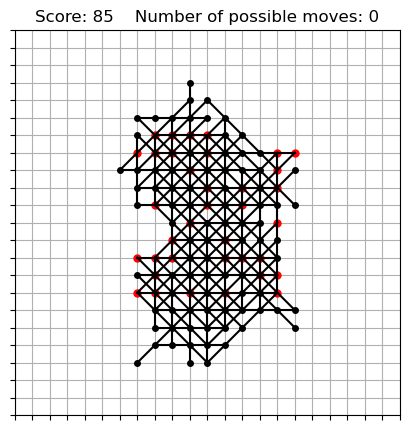

In [43]:
%%time
game.restart()
game.playNestedMC(1)
game.print()

CPU times: user 125 ms, sys: 15 µs, total: 125 ms
Wall time: 123 ms


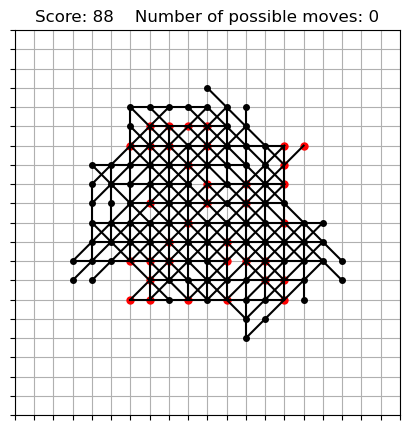

In [44]:
%%time
game.restart()
game.playFastNestedMC(1)
game.print()

CPU times: user 892 ms, sys: 11.9 ms, total: 904 ms
Wall time: 888 ms


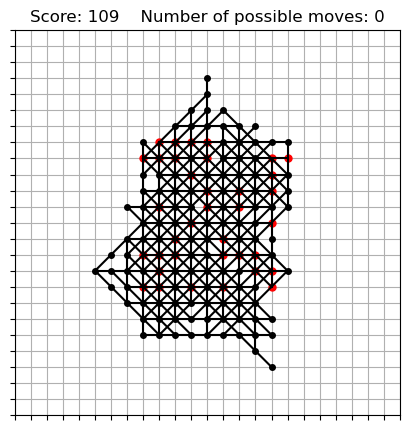

In [45]:
%%time
game.restart()
game.playNestedMC(2)
game.print()

CPU times: user 779 ms, sys: 164 µs, total: 780 ms
Wall time: 767 ms


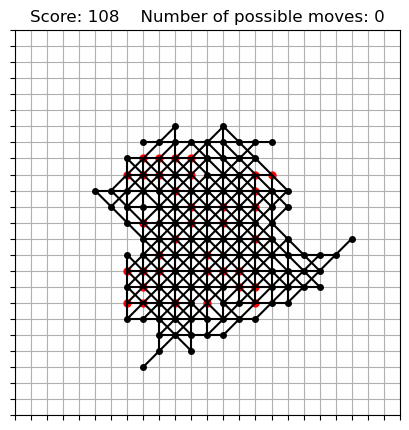

In [46]:
%%time
game.restart()
game.playFastNestedMC(2)
game.print()

CPU times: user 4min 10s, sys: 1.08 s, total: 4min 11s
Wall time: 4min 7s


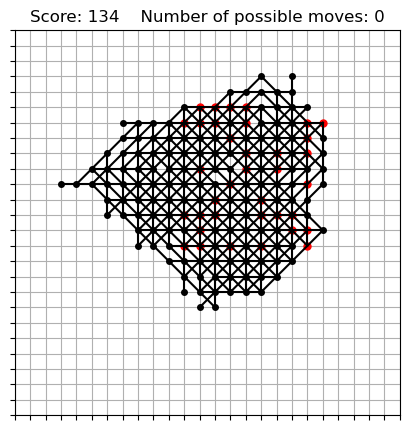

In [47]:
%%time
game.restart()
game.playNestedMC(3)
game.print()

CPU times: user 3min 17s, sys: 1.01 s, total: 3min 18s
Wall time: 3min 15s


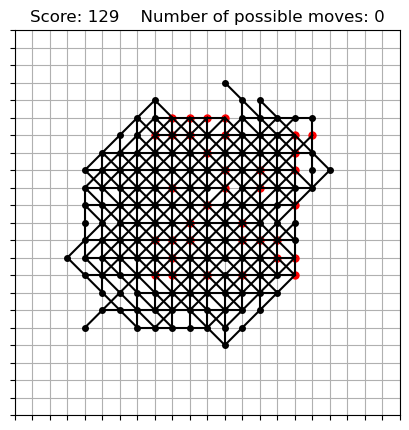

In [48]:
%%time
game.restart()
game.playFastNestedMC(3)
game.print()

In [16]:
# game.save('data/highest_score.json')

In [ ]:
# %%time
# game.restart()
# game.playNestedMCVariant(4)
# game.print()

Best games obtained so far:

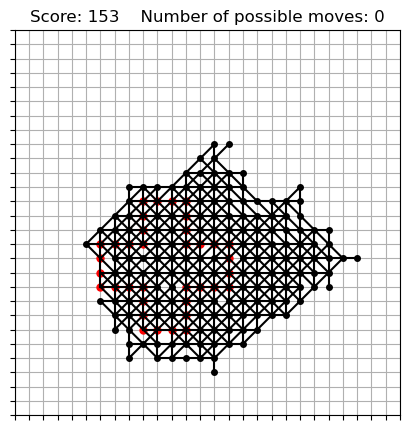

In [4]:
best_game = PyMorpionSolitaire.Game5T.load('data/games/cross5T_153_54955.json')
best_game.print()

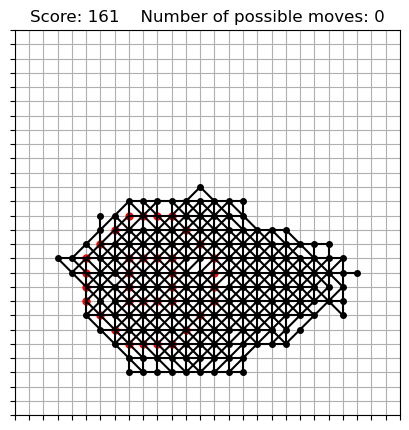

In [6]:
best_game = PyMorpionSolitaire.Game5T.load('data/games/pipe5T_161_94221.json')
best_game.print()